In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import itertools
import math
from adjustText import adjust_text

sns.set(font_scale=1)

In [14]:
# load table
kl_type = 'KL2'
GWAS_result = f'{kl_type}.tsv'

gwas_df = pd.read_csv(GWAS_result, sep='\t')

In [15]:
# fitler bad chisquer
filt_chisq = (gwas_df['notes'] == 'bad-chisq')
gwas_df = gwas_df.loc[~filt_chisq]
gwas_df['-log(lrt-pvalue)'] = - np.log10(gwas_df['lrt-pvalue'])
gwas_df['effect (beta)'] = gwas_df['beta']
gwas_df.head(2)

,variant,af,filter-pvalue,lrt-pvalue,beta,beta-std-err,variant_h2,lineage,k-samples,nk-samples,notes,-log(lrt-pvalue),effect (beta)
0,PC00014,0.437,0.04260,0.779,-0.000118,0.000422,0.00601,MDS8,"1002KBV_KPN_519AG,1003KBV_KQQ_856ZZ,1006KBV_KP...","1000KBV_KOX_6ZZ,1001KBV_KPN_240BB,1004KBV_KPN_...",NaN,0.108463,-0.000118
1,PC00018,0.352,0.00073,0.807,-0.000129,0.000528,0.00524,MDS8,"1006KBV_KPN_350AK,1009KBV_KPN_43BJ,1011KBV_KPN...","1000KBV_KOX_6ZZ,1001KBV_KPN_240BB,1002KBV_KPN_...",NaN,0.093126,-0.000129


6

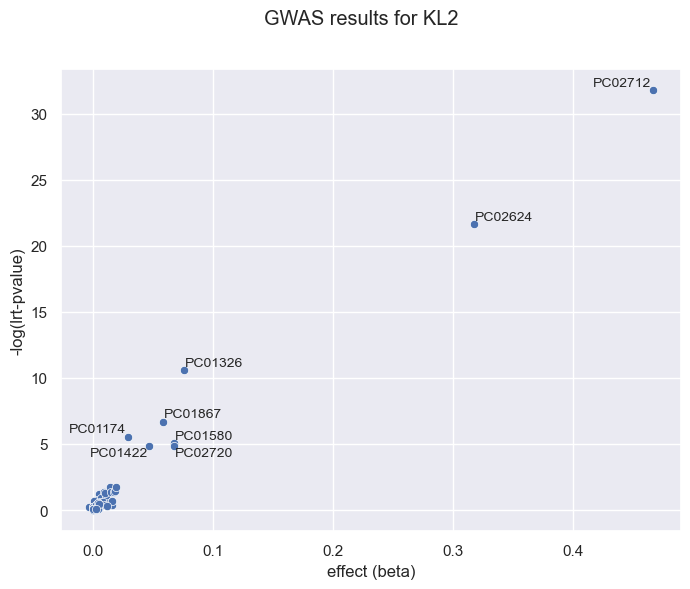

In [25]:
# plot 
fig, ax = plt.subplots(1,1, figsize=(8,6))
fig.suptitle(f'GWAS results for {kl_type}')

# vulcano plot
sns.scatterplot(data=gwas_df, x='effect (beta)', y='-log(lrt-pvalue)', ax=ax, legend=False)

# add labels
data_labels = list(gwas_df[['variant', 'effect (beta)', '-log(lrt-pvalue)']].itertuples(index=False, name=None))

texts = [plt.text(x, y, label, ha='center', va='center', size=10) for label, x, y in data_labels if y >= 4]
adjust_text(texts)
